<a href="https://colab.research.google.com/github/ElenaPopD/sentiment_analysys_script/blob/main/Sentiment_analysys_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests bs4 nltk textblob matplotlib seaborn


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.bulksupplements.com/ro-ro/products/extract-de-ciuperci-coama-leu'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


# Extract reviews
# Note: You need to check the actual HTML structure of the iHerb review page to find the correct class or ID for reviews
reviews = soup.find_all('p', class_='stamped-review-content-body')  # This is an example; replace with actual class or ID
review_texts = [review.get_text() for review in reviews]
print(reviews)
print(review_texts)


[<p class="stamped-review-content-body">Amazing experience</p>, <p class="stamped-review-content-body">Awesome product strongly recommend, saw results immediately</p>, <p class="stamped-review-content-body">Easy. I feel I get a lot for my money. They did this supplement right as far as it being an extract instead of a powder and using the fruiting body of the mushroom instead of the chitin. I've noticed a decrease in headaches and improved focus. Will continue to take.</p>, <p class="stamped-review-content-body">Amazing quality, excellent service. Thanks guys!</p>, <p class="stamped-review-content-body">The products arrived here safely, they were what I ordered, I was alerted of some shipping delays. No complaints</p>, <p class="stamped-review-content-body">Hello Patrick,
Thank you so much for your five-star review. We are delighted to hear that you had a positive experience with us at BulkSupplements.com.Feel free to reach out to customer service with any questions or concerns at cs@b

In [ ]:
from textblob import TextBlob

sentiments = []
for review in review_texts:
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity  # polarity ranges from -1 (negative) to 1 (positive)
    sentiments.append(sentiment)

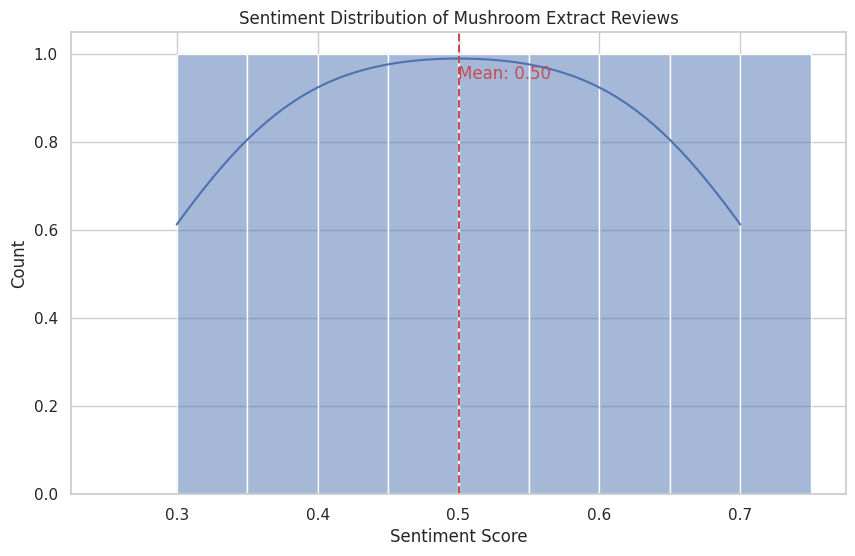

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample sentiment scores for demonstration purposes
# Replace this with your actual sentiment scores
sentiments = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

# 1. Label your bins clearly
# You can define the number and range of bins using the `bins` parameter.
bins = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]

# 4. Use a larger range for sentiment scores
# Adjust the range of your histogram to the full range of sentiment (-1 to 1)
full_bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]

# Create the histogram with the defined bins
plt.figure(figsize=(10, 6))
sns.histplot(sentiments, bins=bins, kde=True)

# 2. Include more bins
# This is done above with the `bins` parameter.

# 3. Annotate key statistics
mean_sentiment = sum(sentiments) / len(sentiments)
plt.axvline(mean_sentiment, color='r', linestyle='--')
plt.text(mean_sentiment, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_sentiment:.2f}',
         color = 'r', horizontalalignment='left')

# 5. Improve the visual design
# Adjusting colors and line styles for clarity
sns.set(style="whitegrid")

# 6. Include a title that describes the product
plt.title('Sentiment Distribution of Mushroom Extract Reviews')

# 7. Add a legend if necessary
# For this single distribution, a legend is not necessary. But you can add one if you have multiple distributions.

# Axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Count')

# Show the plot with all the enhancements
plt.show()